In [1]:
import pandas as pd

crime_data = pd.read_csv('Compiled_Data.csv', encoding='utf-8')
crime_data.drop('Unnamed: 0', axis=1,inplace=True)
crime_data.head()

lng      lat                       crime           barangay  \
0  125.808  7.44808  Vehicular Traffic Accident  Magugpo Poblacion   
1  125.803  7.44675                      MURDER  Magugpo Poblacion   
2  125.803  7.44897           PHYSICAL INJURIES  Magugpo Poblacion   
3  125.818  7.45982                      MURDER      Magugpo North   
4  125.818  7.46016           PHYSICAL INJURIES      Magugpo North   

         city             modus        time_epoch     day Weather  \
0  Tagum City     Not Indicated  After Work-Hours  Sunday   Clear   
1  Tagum City  Stabbing/Hacking    After Midnight  Sunday  Cloudy   
2  Tagum City  Stabbing/Hacking    After Midnight  Sunday  Cloudy   
3  Tagum City          Shooting           Evening  Sunday  Cloudy   
4  Tagum City          Shooting           Evening  Sunday  Cloudy   

   Temp (deg celsius)         ...          \
0                30.0         ...           
1                23.0         ...           
2                23.0         ...           
3                27.0         ...           
4                27.0         ...           

   Poverty,poverty incidence by population  \
0                                    718.5   
1                                    718.5   
2                                    718.5   
3                                   2122.5   
4                                   2122.5   

   Poverty,poverty incidence by unemployed  Consumer Price Index  - all items  \
0                                     13.0                              159.2   
1                                     13.0                              159.2   
2                                     13.0                              159.2   
3                                     38.5                              159.2   
4                                     38.5                              159.2   

   Consumer Price Index -Alcoholic beverages and tobacco  \
0                                              183.6       
1                                              183.6       
2                                              183.6       
3                                              183.6       
4                                              183.6       

   Consumer Price Index -transport  \
0                            140.2   
1                            140.2   
2                            140.2   
3                            140.2   
4                            140.2   

   Consumer Price Index -Housing, water, electricity, gas, and other fuels  \
0                                              143.6                         
1                                              143.6                         
2                                              143.6                         
3                                              143.6                         
4                                              143.6                         

  Consumer Price Index -Restaurant and miscellaneous goods and services  \
0                                              137.4                      
1                                              137.4                      
2                                              137.4                      
3                                              137.4                      
4                                              137.4                      

   inflation rate  savings deposit interest rate  bank lending rates  
0             2.2                          0.707               5.673  
1             2.2                          0.707               5.673  
2             2.2                          0.707               5.673  
3             2.2                          0.707               5.673  
4             2.2                          0.707               5.673  

[5 rows x 130 columns]

In [2]:
cols = ['Bank',
'Bar',
'Beach',
'Bridge',
'Cemetery',
'Church',
'Clinic',
'Commercial Building',
'Community Center',
'Convenience Store',
'Fire Station',
'Gas Station',
'Government Office',
'Greenfield',
'Highway',
'Highway Pedestrian',
'Highway Primary',
'Highway Residential',
'Highway Secondary',
'Highway Tertiary',
'Hospital',
'Hotel',
'Industrial Building',
'Mall',
'Marketplace',
'Park',
'Parking Area',
'Pawnshop',
'Pharmacy',
'Police Station',
'Post Office',
'Private Office',
'Recreational Area',
'Residential Building',
'Restaurant',
'Road',
'School',
'Sports Center',
'Tourist Attraction',
'Transport Terminal']

In [3]:
#one-hot encoding place
import numpy as np
for index,row in crime_data[cols].iterrows():
    for col in cols:
        if crime_data.loc[index,col] >= 0 and crime_data.loc[index,col] <= 200:
            crime_data.at[index,col] = 1
        else:
            crime_data.at[index,col] = 0
crime_data[cols] = crime_data[cols].astype(np.uint8)
crime_data[cols].head()

Bank  Bar  Beach  Bridge  Cemetery  Church  Clinic  Commercial Building  \
0     1    0      0       0         0       1       1                    1   
1     1    1      0       0         0       1       0                    1   
2     1    0      0       0         0       0       0                    1   
3     0    0      0       0         0       1       0                    0   
4     0    0      0       0         0       1       0                    0   

   Community Center  Convenience Store         ...          Post Office  \
0                 1                  0         ...                    0   
1                 0                  1         ...                    0   
2                 1                  0         ...                    1   
3                 0                  0         ...                    0   
4                 0                  0         ...                    0   

   Private Office  Recreational Area  Residential Building  Restaurant  Road  \
0               0                  0                     0           1     0   
1               1                  0                     0           1     0   
2               1                  1                     0           1     0   
3               0                  0                     0           1     0   
4               0                  0                     0           1     0   

   School  Sports Center  Tourist Attraction  Transport Terminal  
0       0              0                   0                   0  
1       1              0                   0                   0  
2       1              0                   1                   0  
3       1              0                   0                   0  
4       1              0                   0                   0  

[5 rows x 40 columns]

In [4]:
#one hot encoding categorical variables
string_columns_independent_var = [
    'time_epoch',
    'day',
    'Weather',
    'day_night',
    'placetype'
]

In [5]:
crime_data = pd.get_dummies(crime_data, columns=string_columns_independent_var)

In [6]:
print(len(crime_data.columns))
for col in crime_data.columns:
    print("'{}',".format(col))

145
'lng',
'lat',
'crime',
'barangay',
'city',
'modus',
'Temp (deg celsius)',
'Feels Like (deg celsius)',
'Wind (km/h)',
'Cloud',
'Humidity',
'Precip (mm)',
'Pressure (mb)',
'Bank',
'Bar',
'Beach',
'Bridge',
'Cemetery',
'Church',
'Clinic',
'Commercial Building',
'Community Center',
'Convenience Store',
'Fire Station',
'Gas Station',
'Government Office',
'Greenfield',
'Highway',
'Highway Pedestrian',
'Highway Primary',
'Highway Residential',
'Highway Secondary',
'Highway Tertiary',
'Hospital',
'Hotel',
'Industrial Building',
'Mall',
'Marketplace',
'Park',
'Parking Area',
'Pawnshop',
'Pharmacy',
'Police Station',
'Post Office',
'Private Office',
'Recreational Area',
'Residential Building',
'Restaurant',
'Road',
'School',
'Sports Center',
'Tourist Attraction',
'Transport Terminal',
'php-usd-rate',
'PSE-index-Close',
'year',
'month_num',
'land area sq km',
'Education,Baccalauate graduate',
'Education,College undergraduate',
'Education,Elementary',
'Education,High school',
'Education,No gra

In [7]:
print(len(crime_data.columns))
for col in crime_data.columns:
    print("{} --- {}".format(type(crime_data[col][0]),col))

145
<class 'numpy.float64'> --- lng
<class 'numpy.float64'> --- lat
<class 'str'> --- crime
<class 'str'> --- barangay
<class 'str'> --- city
<class 'str'> --- modus
<class 'numpy.float64'> --- Temp (deg celsius)
<class 'numpy.float64'> --- Feels Like (deg celsius)
<class 'numpy.float64'> --- Wind (km/h)
<class 'numpy.float64'> --- Cloud
<class 'numpy.float64'> --- Humidity
<class 'numpy.float64'> --- Precip (mm)
<class 'numpy.float64'> --- Pressure (mb)
<class 'numpy.uint8'> --- Bank
<class 'numpy.uint8'> --- Bar
<class 'numpy.uint8'> --- Beach
<class 'numpy.uint8'> --- Bridge
<class 'numpy.uint8'> --- Cemetery
<class 'numpy.uint8'> --- Church
<class 'numpy.uint8'> --- Clinic
<class 'numpy.uint8'> --- Commercial Building
<class 'numpy.uint8'> --- Community Center
<class 'numpy.uint8'> --- Convenience Store
<class 'numpy.uint8'> --- Fire Station
<class 'numpy.uint8'> --- Gas Station
<class 'numpy.uint8'> --- Government Office
<class 'numpy.uint8'> --- Greenfield
<class 'numpy.uint8'> -

In [8]:
#label dependent variable
crime_data['crime'] = crime_data['crime'].astype('category')
crime_data['crime_label'] = crime_data['crime'].cat.codes
crime_data.head()

lng      lat                       crime           barangay  \
0  125.808  7.44808  Vehicular Traffic Accident  Magugpo Poblacion   
1  125.803  7.44675                      MURDER  Magugpo Poblacion   
2  125.803  7.44897           PHYSICAL INJURIES  Magugpo Poblacion   
3  125.818  7.45982                      MURDER      Magugpo North   
4  125.818  7.46016           PHYSICAL INJURIES      Magugpo North   

         city             modus  Temp (deg celsius)  Feels Like (deg celsius)  \
0  Tagum City     Not Indicated                30.0                      32.0   
1  Tagum City  Stabbing/Hacking                23.0                      25.0   
2  Tagum City  Stabbing/Hacking                23.0                      25.0   
3  Tagum City          Shooting                27.0                      29.0   
4  Tagum City          Shooting                27.0                      29.0   

   Wind (km/h)  Cloud     ...       day_Tuesday  day_Wednesday  Weather_Clear  \
0         15.0   0.57     ...                 0              0              1   
1          8.0   0.18     ...                 0              0              0   
2          8.0   0.18     ...                 0              0              0   
3         13.0   0.01     ...                 0              0              0   
4         13.0   0.01     ...                 0              0              0   

   Weather_Cloudy  Weather_Rainy  day_night_daylight  day_night_nighttime  \
0               0              0                   1                    0   
1               1              0                   0                    1   
2               1              0                   0                    1   
3               1              0                   0                    1   
4               1              0                   0                    1   

   placetype_rural  placetype_urban  crime_label  
0                0                1            8  
1                0                1            3  
2                0                1            4  
3                0                1            3  
4                0                1            4  

[5 rows x 146 columns]

In [9]:
crime_dict = dict(zip(crime_data['crime_label'].unique(), crime_data['crime'].unique()))
crime_dict

{8: 'Vehicular Traffic Accident',
 3: 'MURDER',
 4: 'PHYSICAL INJURIES',
 1: 'Drug Related Incident (RA 9165)',
 7: 'THEFT',
 0: 'ANTI-CARNAPPING ACT (R.A. 6539) MC',
 5: 'RAPE (Art. 266-A RC & R.A.8353)',
 6: 'ROBBERY',
 2: 'HOMICIDE'}

In [10]:
sorted(crime_dict.values())
crime_names = []
x=0
while x < len(crime_dict):
    print(crime_dict[x])
    crime_names.append(crime_dict[x])
    x+=1

ANTI-CARNAPPING ACT (R.A. 6539) MC
Drug Related Incident (RA 9165)
HOMICIDE
MURDER
PHYSICAL INJURIES
RAPE (Art. 266-A RC & R.A.8353)
ROBBERY
THEFT
Vehicular Traffic Accident


In [11]:
crime_data['modus'] = crime_data['modus'].astype('category')
crime_data['modus_label'] = crime_data['modus'].cat.codes
crime_data.head()

lng      lat                       crime           barangay  \
0  125.808  7.44808  Vehicular Traffic Accident  Magugpo Poblacion   
1  125.803  7.44675                      MURDER  Magugpo Poblacion   
2  125.803  7.44897           PHYSICAL INJURIES  Magugpo Poblacion   
3  125.818  7.45982                      MURDER      Magugpo North   
4  125.818  7.46016           PHYSICAL INJURIES      Magugpo North   

         city             modus  Temp (deg celsius)  Feels Like (deg celsius)  \
0  Tagum City     Not Indicated                30.0                      32.0   
1  Tagum City  Stabbing/Hacking                23.0                      25.0   
2  Tagum City  Stabbing/Hacking                23.0                      25.0   
3  Tagum City          Shooting                27.0                      29.0   
4  Tagum City          Shooting                27.0                      29.0   

   Wind (km/h)  Cloud     ...       day_Wednesday  Weather_Clear  \
0         15.0   0.57     ...                   0              1   
1          8.0   0.18     ...                   0              0   
2          8.0   0.18     ...                   0              0   
3         13.0   0.01     ...                   0              0   
4         13.0   0.01     ...                   0              0   

   Weather_Cloudy  Weather_Rainy  day_night_daylight  day_night_nighttime  \
0               0              0                   1                    0   
1               1              0                   0                    1   
2               1              0                   0                    1   
3               1              0                   0                    1   
4               1              0                   0                    1   

   placetype_rural  placetype_urban  crime_label  modus_label  
0                0                1            8           28  
1                0                1            3           42  
2                0                1            4           42  
3                0                1            3           39  
4                0                1            4           39  

[5 rows x 147 columns]

In [12]:
#remove places outliers
# outliers = ['Bar',
#  'Beach',
#  'Bridge',
#  'Cemetery',
#  'Clinic',
#  'Fire Station',
#  'Government Office',
#  'Industrial Building',
#  'Parking Area',
#  'Pawnshop',
#  'Police Station',
#  'Post Office',
#  'Private Office',
#  'Recreational Area',
#  'Road',
#  'Sports Center',
#  'Tourist Attraction',
#  'Transport Terminal']
# crime_data.drop(labels=outliers,axis=1,inplace=True)

In [13]:
crime_data.to_csv('Normalized.csv')

# Modeling

In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

crime = crime_data.copy()
crime.head()

lng      lat                       crime           barangay  \
0  125.808  7.44808  Vehicular Traffic Accident  Magugpo Poblacion   
1  125.803  7.44675                      MURDER  Magugpo Poblacion   
2  125.803  7.44897           PHYSICAL INJURIES  Magugpo Poblacion   
3  125.818  7.45982                      MURDER      Magugpo North   
4  125.818  7.46016           PHYSICAL INJURIES      Magugpo North   

         city             modus  Temp (deg celsius)  Feels Like (deg celsius)  \
0  Tagum City     Not Indicated                30.0                      32.0   
1  Tagum City  Stabbing/Hacking                23.0                      25.0   
2  Tagum City  Stabbing/Hacking                23.0                      25.0   
3  Tagum City          Shooting                27.0                      29.0   
4  Tagum City          Shooting                27.0                      29.0   

   Wind (km/h)  Cloud     ...       day_Wednesday  Weather_Clear  \
0         15.0   0.57     ...                   0              1   
1          8.0   0.18     ...                   0              0   
2          8.0   0.18     ...                   0              0   
3         13.0   0.01     ...                   0              0   
4         13.0   0.01     ...                   0              0   

   Weather_Cloudy  Weather_Rainy  day_night_daylight  day_night_nighttime  \
0               0              0                   1                    0   
1               1              0                   0                    1   
2               1              0                   0                    1   
3               1              0                   0                    1   
4               1              0                   0                    1   

   placetype_rural  placetype_urban  crime_label  modus_label  
0                0                1            8           28  
1                0                1            3           42  
2                0                1            4           42  
3                0                1            3           39  
4                0                1            4           39  

[5 rows x 147 columns]

In [15]:
crime.shape

(1116, 147)

## Create train-test split 

In [16]:
independent_columns = []
exclude_cols = ['crime','barangay','city','modus',
                'modus_label','crime_label','year',
                'month_num','land area sq km']
for each in crime.columns:
    if each not in exclude_cols:
        independent_columns.append(each)
independent_columns

['lng',
 'lat',
 'Temp (deg celsius)',
 'Feels Like (deg celsius)',
 'Wind (km/h)',
 'Cloud',
 'Humidity',
 'Precip (mm)',
 'Pressure (mb)',
 'Bank',
 'Bar',
 'Beach',
 'Bridge',
 'Cemetery',
 'Church',
 'Clinic',
 'Commercial Building',
 'Community Center',
 'Convenience Store',
 'Fire Station',
 'Gas Station',
 'Government Office',
 'Greenfield',
 'Highway',
 'Highway Pedestrian',
 'Highway Primary',
 'Highway Residential',
 'Highway Secondary',
 'Highway Tertiary',
 'Hospital',
 'Hotel',
 'Industrial Building',
 'Mall',
 'Marketplace',
 'Park',
 'Parking Area',
 'Pawnshop',
 'Pharmacy',
 'Police Station',
 'Post Office',
 'Private Office',
 'Recreational Area',
 'Residential Building',
 'Restaurant',
 'Road',
 'School',
 'Sports Center',
 'Tourist Attraction',
 'Transport Terminal',
 'php-usd-rate',
 'PSE-index-Close',
 'Education,Baccalauate graduate',
 'Education,College undergraduate',
 'Education,Elementary',
 'Education,High school',
 'Education,No grade completed',
 'Education

In [17]:
corr = crime_data[independent_columns].corr(method='pearson')
corr.style.background_gradient().set_precision(2)

## Create Classifier

### select one value to predict

In [48]:
import random
import json
index = random.randint(0,crime.shape[0]-1)
pred = crime.loc[index, independent_columns]
# print(pred.keys())
# print(pred['lng'])
values = {}
for key in pred.keys():
    values[key] = pred[key]
print(values)

# df = pd.DataFrame([values])
# df
correct_crime  = crime.loc[index, 'crime']
correct_crime

{'lng': 125.806, 'lat': 7.4329399999999985, 'Temp (deg celsius)': 40.0, 'Feels Like (deg celsius)': 46.0, 'Wind (km/h)': 3.0, 'Cloud': 0.47, 'Humidity': 0.46, 'Precip (mm)': 0.2, 'Pressure (mb)': 1009.0, 'Bank': 0, 'Bar': 0, 'Beach': 0, 'Bridge': 0, 'Cemetery': 0, 'Church': 0, 'Clinic': 0, 'Commercial Building': 0, 'Community Center': 0, 'Convenience Store': 0, 'Fire Station': 0, 'Gas Station': 0, 'Government Office': 0, 'Greenfield': 0, 'Highway': 0, 'Highway Pedestrian': 0, 'Highway Primary': 0, 'Highway Residential': 1, 'Highway Secondary': 0, 'Highway Tertiary': 0, 'Hospital': 0, 'Hotel': 0, 'Industrial Building': 0, 'Mall': 0, 'Marketplace': 0, 'Park': 1, 'Parking Area': 0, 'Pawnshop': 0, 'Pharmacy': 0, 'Police Station': 0, 'Post Office': 0, 'Private Office': 0, 'Recreational Area': 0, 'Residential Building': 1, 'Restaurant': 0, 'Road': 0, 'School': 0, 'Sports Center': 1, 'Tourist Attraction': 0, 'Transport Terminal': 0, 'php-usd-rate': 51.05, 'PSE-index-Close': 8015.140137, 'Educ

Bank  Bar  Beach  Bridge  Cemetery  Church  Clinic  Cloud  \
0     0    0      0       0         0       0       0   0.47   

   Commercial Building  Community Center         ...          php-usd-rate  \
0                    0                 0         ...                 51.05   

   placetype_rural  placetype_urban  savings deposit interest rate  \
0                0                1                          0.713   

   time_epoch_After Midnight  time_epoch_After Work-Hours  \
0                          0                            0   

   time_epoch_Afternoon  time_epoch_Early Morning  time_epoch_Evening  \
0                     1                         0                   0   

   time_epoch_Morning  
0                   0  

[1 rows x 138 columns]

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def TrainingTagum_TestPanaboSamal(model):
    train_df = crime[crime['city'] == 'Tagum City']
    test_df = crime[crime['city'] != 'Tagum City']
    
    Xo_train = train_df[independent_columns]
    Xo_test = test_df[independent_columns]
    yo_train = train_df['crime_label']
    yo_test = test_df['crime_label']
    
    folds = []
    model.fit(Xo_train, yo_train)
    to_eval_x = Xo_test
    to_eval_y = yo_test
    to_eval_score = model.predict(to_eval_x)
    precision = precision_score(to_eval_y, to_eval_score, average=None)
    accuracy = accuracy_score(to_eval_y, to_eval_score)
    recall = recall_score(to_eval_y, to_eval_score, average=None)
    f1 = f1_score(to_eval_y, to_eval_score, average=None)
    folds.append({
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })
    
    indexes = ['Accuracy']
    for ind in ['Precision','Recall','F1']:
        x=0
        while x < len(crime_dict):
            indexes.append("{}_{}".format(ind,crime_dict[x]))
            x+=1
    model_eval = {'index': indexes}
    x=0
    for each in folds:
        foldname = 'TagumTrain PanaboSamalTest'
        arrays_ls = []
        for key, value in each.items():
            if key in ['precision','recall','f1']:
                for val in value:
                    arrays_ls.append(val*100)
            else:
                arrays_ls.append(value*100)
        model_eval[foldname] = arrays_ls
        x+=1
    df = pd.DataFrame(data=model_eval)
    df.set_index('index', inplace=True)
    return df,to_eval_y, to_eval_score

def TrainStratifiedFolds(model):
    # evaluate models
    X = crime[independent_columns]
    y = crime['crime_label']
    folds = []
    split_num = 3
    skf = StratifiedKFold(n_splits=split_num, random_state=None, shuffle=True)
    for train_i, test_i in skf.split(X, y):
        Xo_train = crime.loc[train_i,independent_columns]
        Xo_test = crime.loc[test_i,independent_columns]
        yo_train = crime.loc[train_i,'crime_label']
        yo_test = crime.loc[test_i,'crime_label']
        
#         gg = pd.DataFrame(data=yo_test)
#         f = pd.DataFrame(data=Xo_test)
#         return gg.join(f)
        model.fit(Xo_train, yo_train)
        try:
            to_eval_x = Xo_test
            to_eval_y = yo_test
            to_eval_score = model.predict(to_eval_x)
            precision = precision_score(to_eval_y, to_eval_score, average=None)
            accuracy = accuracy_score(to_eval_y, to_eval_score)
            recall = recall_score(to_eval_y, to_eval_score, average=None)
            f1 = f1_score(to_eval_y, to_eval_score, average=None)
            folds.append({
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1
            })
        except:
            print('')
        
    scoring_category = ['accuracy','precision','recall','f1']
    mean_df = {}
    for sc in scoring_category:
        x=0
        mean_array = []
        while x < len(folds):
            mean_array.append([folds[x][sc]])
            x+=1
        mean_df[sc] = np.mean(np.array(mean_array), axis=0)[0]
    folds.append(mean_df)
    
    indexes = ['Accuracy']
    for ind in ['Precision','Recall','F1']:
        x=0
        while x < len(crime_dict):
            indexes.append("{}_{}".format(ind,crime_dict[x]))
            x+=1
    model_eval = {'index': indexes}
    x=0
    for each in folds:
        if x == len(folds) - 1:
            foldname = 'mean'
        else:
            foldname = 'fold_{}'.format(x+1)
        arrays_ls = []
        for key, value in each.items():
            if key in ['precision','recall','f1']:
                for val in value:
                    arrays_ls.append(val*100)
            else:
                arrays_ls.append(value*100)
        model_eval[foldname] = arrays_ls
        x+=1
    df = pd.DataFrame(data=model_eval)
    df.set_index('index', inplace=True)
    return df,to_eval_y, to_eval_score

def evaluate_model(model):
    df_strat,strat_eval_y, strat_eval_score = TrainStratifiedFolds(model)
    df,to_eval_y, to_eval_score = TrainingTagum_TestPanaboSamal(model)
    show_mat_sf(strat_eval_y, strat_eval_score)
    show_mat_tps(to_eval_y, to_eval_score)
    return df_strat.join(df)

def show_mat_sf(y_eval, score_eval):
    confusion_mc = confusion_matrix(y_eval, score_eval)
    plt.figure(figsize=(5.5,4))
    sns.heatmap(pd.DataFrame(confusion_mc), annot=True)
    plt.title('StratifiedFold')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def show_mat_tps(y_eval, score_eval):
    plt.figure(figsize=(5.5,4))
    confusion_mc = confusion_matrix(y_eval, score_eval)
    sns.heatmap(pd.DataFrame(confusion_mc), annot=True)
    plt.title('TagumTrain PanaboSamalTest')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Nearest Neighbor 

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

<IPython.core.display.Javascript object>


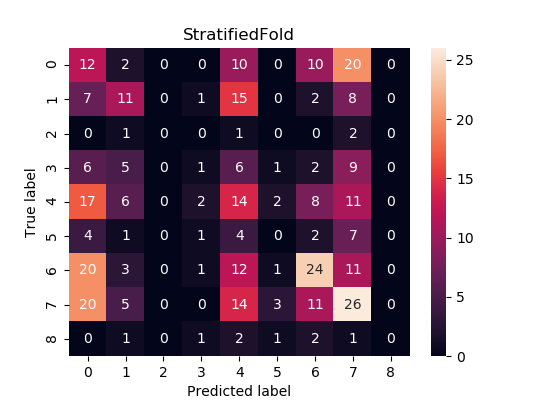

<IPython.core.display.Javascript object>


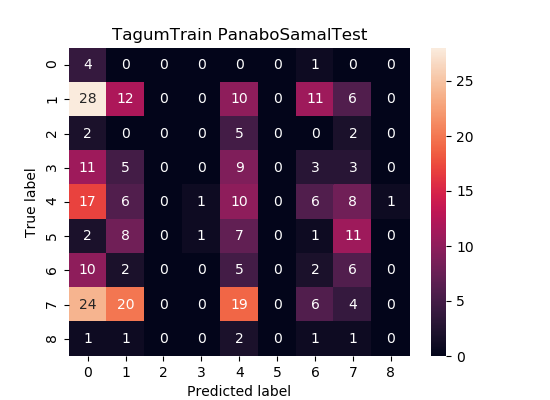

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      30.481283  27.150538  23.783784   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  24.390244  17.948718  13.953488   
Precision_Drug Related Incident (RA 9165)     40.677966  32.835821  31.428571   
Precision_HOMICIDE                             0.000000   0.000000   0.000000   
Precision_MURDER                               0.000000   0.000000  14.285714   
Precision_PHYSICAL INJURIES                   23.728814  35.897436  17.948718   
Precision_RAPE (Art. 266-A RC & R.A.8353)      0.000000  33.333333   0.000000   
Precision_ROBBERY                             33.333333  22.535211  39.344262   
Precision_THEFT                               33.333333  30.476190  27.368421   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     37.037037  25.925926  22.222222   
Recall_Drug Related Incident (RA 9165)        53.333333  50.000000  25.000000   
Recall_HOMICIDE                                0.000000   0.000000   0.000000   
Recall_MURDER                                  0.000000   0.000000   3.333333   
Recall_PHYSICAL INJURIES                      23.333333  23.333333  23.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)         0.000000  15.789474   0.000000   
Recall_ROBBERY                                36.986301  21.917808  33.333333   
Recall_THEFT                                  36.250000  40.000000  32.911392   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         29.411765  21.212121  17.142857   
F1_Drug Related Incident (RA 9165)            46.153846  39.639640  27.848101   
F1_HOMICIDE                                    0.000000   0.000000   0.000000   
F1_MURDER                                      0.000000   0.000000   5.405405   
F1_PHYSICAL INJURIES                          23.529412  28.282828  20.289855   
F1_RAPE (Art. 266-A RC & R.A.8353)             0.000000  21.428571   0.000000   
F1_ROBBERY                                    35.064935  22.222222  36.090226   
F1_THEFT                                      34.730539  34.594595  29.885057   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      27.138535   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  18.764150   
Precision_Drug Related Incident (RA 9165)     34.980786   
Precision_HOMICIDE                             0.000000   
Precision_MURDER                               4.761905   
Precision_PHYSICAL INJURIES                   25.858322   
Precision_RAPE (Art. 266-A RC & R.A.8353)     11.111111   
Precision_ROBBERY                             31.737602   
Precision_THEFT                               30.392648   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     28.395062   
Recall_Drug Related Incident (RA 9165)        42.777778   
Recall_HOMICIDE                                0.000000   
Recall_MURDER                                  1.111111   
Recall_PHYSICAL INJURIES                      23.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)         5.263158   
Recall_ROBBERY                                30.745814   
Recall_THEFT                                  36.387131   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         22.588914   
F1_Drug Related Incident (RA 9165)            37.880529   
F1_HOMICIDE                                    0.000000   
F1_MURDER                                      1.801802   
F1_PHYSICAL INJURIES                          24.034032   
F1_RAPE (Art. 266-A RC & R.A.8353)             7.142857   
F1_ROBBERY               

In [20]:
from sklearn.neighbors import KNeighborsClassifier

evaluate_model(KNeighborsClassifier(n_neighbors=15))

### SVM

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packag

<IPython.core.display.Javascript object>


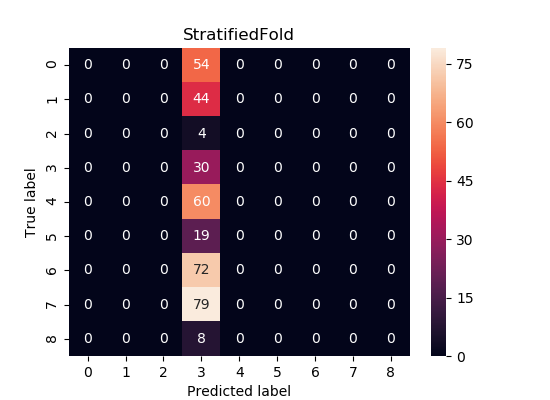

<IPython.core.display.Javascript object>


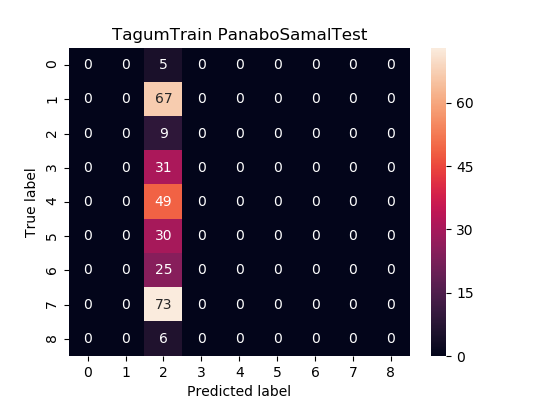

fold_1      fold_2  \
index                                                                  
Accuracy                                        1.069519    8.064516   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC    0.000000    0.000000   
Precision_Drug Related Incident (RA 9165)       0.000000    0.000000   
Precision_HOMICIDE                              1.069519    0.000000   
Precision_MURDER                                0.000000    8.064516   
Precision_PHYSICAL INJURIES                     0.000000    0.000000   
Precision_RAPE (Art. 266-A RC & R.A.8353)       0.000000    0.000000   
Precision_ROBBERY                               0.000000    0.000000   
Precision_THEFT                                 0.000000    0.000000   
Precision_Vehicular Traffic Accident            0.000000    0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC       0.000000    0.000000   
Recall_Drug Related Incident (RA 9165)          0.000000    0.000000   
Recall_HOMICIDE                               100.000000    0.000000   
Recall_MURDER                                   0.000000  100.000000   
Recall_PHYSICAL INJURIES                        0.000000    0.000000   
Recall_RAPE (Art. 266-A RC & R.A.8353)          0.000000    0.000000   
Recall_ROBBERY                                  0.000000    0.000000   
Recall_THEFT                                    0.000000    0.000000   
Recall_Vehicular Traffic Accident               0.000000    0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC           0.000000    0.000000   
F1_Drug Related Incident (RA 9165)              0.000000    0.000000   
F1_HOMICIDE                                     2.116402    0.000000   
F1_MURDER                                       0.000000   14.925373   
F1_PHYSICAL INJURIES                            0.000000    0.000000   
F1_RAPE (Art. 266-A RC & R.A.8353)              0.000000    0.000000   
F1_ROBBERY                                      0.000000    0.000000   
F1_THEFT                                        0.000000    0.000000   
F1_Vehicular Traffic Accident                   0.000000    0.000000   

                                                  fold_3       mean  \
index                                                                 
Accuracy                                        8.108108   5.747381   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC    0.000000   0.000000   
Precision_Drug Related Incident (RA 9165)       0.000000   0.000000   
Precision_HOMICIDE                              0.000000   0.356506   
Precision_MURDER                                8.108108   5.390875   
Precision_PHYSICAL INJURIES                     0.000000   0.000000   
Precision_RAPE (Art. 266-A RC & R.A.8353)       0.000000   0.000000   
Precision_ROBBERY                               0.000000   0.000000   
Precision_THEFT                                 0.000000   0.000000   
Precision_Vehicular Traffic Accident            0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC       0.000000   0.000000   
Recall_Drug Related Incident (RA 9165)          0.000000   0.000000   
Recall_HOMICIDE                                 0.000000  33.333333   
Recall_MURDER                                 100.000000  66.666667   
Recall_PHYSICAL INJURIES                        0.000000   0.000000   
Recall_RAPE (Art. 266-A RC & R.A.8353)          0.000000   0.000000   
Recall_ROBBERY                                  0.000000   0.000000   
Recall_THEFT                                    0.000000   0.000000   
Recall_Vehicular Traffic Accident               0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC           0.000000   0.000000   
F1_Drug Related Incident (RA 9165)              0.000000   0.000000   
F1_HOMICIDE                                     0.000000   0.705467   
F1_MURDER                                      15.000000   9.975124   
F1_PHYSICAL INJURIES                            0.000000   0.000000   
F1_RAPE (Art. 266-A RC & R.A.8353)         

In [21]:
from sklearn.svm import LinearSVC
evaluate_model(LinearSVC())

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0

<IPython.core.display.Javascript object>


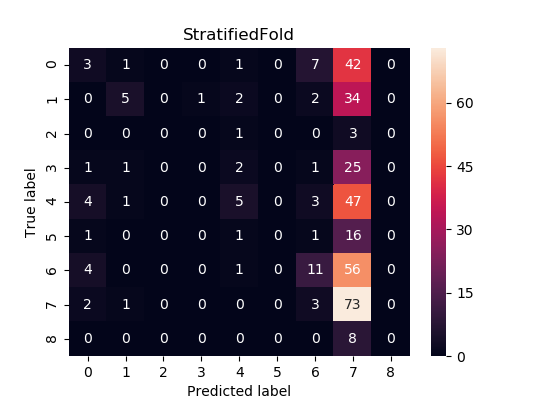

<IPython.core.display.Javascript object>


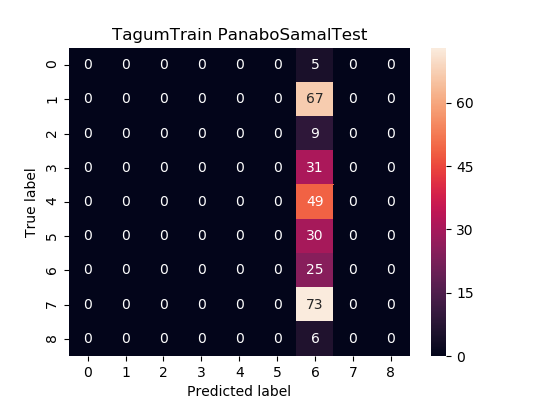

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      23.796791  22.311828  26.216216   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  11.111111  13.043478  20.000000   
Precision_Drug Related Incident (RA 9165)     66.666667  57.142857  55.555556   
Precision_HOMICIDE                             0.000000   0.000000   0.000000   
Precision_MURDER                              16.666667  14.285714   0.000000   
Precision_PHYSICAL INJURIES                   23.529412  38.888889  38.461538   
Precision_RAPE (Art. 266-A RC & R.A.8353)      0.000000   0.000000   0.000000   
Precision_ROBBERY                             33.333333  27.272727  39.285714   
Precision_THEFT                               22.758621  20.588235  24.013158   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      3.703704   5.555556   5.555556   
Recall_Drug Related Incident (RA 9165)         8.888889   9.090909  11.363636   
Recall_HOMICIDE                                0.000000   0.000000   0.000000   
Recall_MURDER                                  3.225806   3.333333   0.000000   
Recall_PHYSICAL INJURIES                       6.666667  11.666667   8.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)         0.000000   0.000000   0.000000   
Recall_ROBBERY                                16.438356  16.438356  15.277778   
Recall_THEFT                                  82.500000  70.000000  92.405063   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          5.555556   7.792208   8.695652   
F1_Drug Related Incident (RA 9165)            15.686275  15.686275  18.867925   
F1_HOMICIDE                                    0.000000   0.000000   0.000000   
F1_MURDER                                      5.405405   5.405405   0.000000   
F1_PHYSICAL INJURIES                          10.389610  17.948718  13.698630   
F1_RAPE (Art. 266-A RC & R.A.8353)             0.000000   0.000000   0.000000   
F1_ROBBERY                                    22.018349  20.512821  22.000000   
F1_THEFT                                      35.675676  31.818182  38.120104   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      24.108279   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  14.718196   
Precision_Drug Related Incident (RA 9165)     59.788360   
Precision_HOMICIDE                             0.000000   
Precision_MURDER                              10.317460   
Precision_PHYSICAL INJURIES                   33.626613   
Precision_RAPE (Art. 266-A RC & R.A.8353)      0.000000   
Precision_ROBBERY                             33.297258   
Precision_THEFT                               22.453338   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      4.938272   
Recall_Drug Related Incident (RA 9165)         9.781145   
Recall_HOMICIDE                                0.000000   
Recall_MURDER                                  2.186380   
Recall_PHYSICAL INJURIES                       8.888889   
Recall_RAPE (Art. 266-A RC & R.A.8353)         0.000000   
Recall_ROBBERY                                16.051497   
Recall_THEFT                                  81.635021   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          7.347805   
F1_Drug Related Incident (RA 9165)            16.746825   
F1_HOMICIDE                                    0.000000   
F1_MURDER                                      3.603604   
F1_PHYSICAL INJURIES                          14.012319   
F1_RAPE (Art. 266-A RC & R.A.8353)             0.000000   
F1_ROBBERY               

In [22]:
from sklearn.svm import SVC
evaluate_model(SVC())

In [23]:
# evaluate_model(SVC(kernel='poly',degree=1, gamma='auto'))

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0

<IPython.core.display.Javascript object>


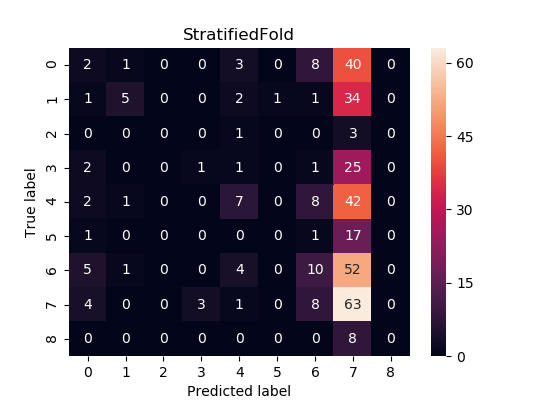

<IPython.core.display.Javascript object>


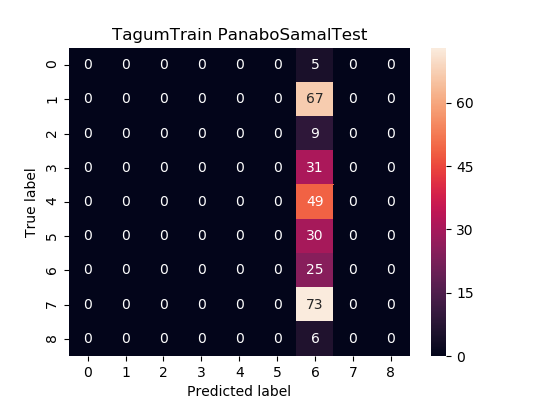

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      23.262032  22.849462  23.783784   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC   8.695652  21.052632  11.764706   
Precision_Drug Related Incident (RA 9165)     71.428571  42.857143  62.500000   
Precision_HOMICIDE                             0.000000   0.000000   0.000000   
Precision_MURDER                              20.000000   0.000000  25.000000   
Precision_PHYSICAL INJURIES                   34.782609  31.250000  36.842105   
Precision_RAPE (Art. 266-A RC & R.A.8353)      0.000000   0.000000   0.000000   
Precision_ROBBERY                             33.333333  22.857143  27.027027   
Precision_THEFT                               21.575342  22.569444  22.183099   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      3.703704   7.407407   3.703704   
Recall_Drug Related Incident (RA 9165)        11.111111   6.818182  11.363636   
Recall_HOMICIDE                                0.000000   0.000000   0.000000   
Recall_MURDER                                  3.225806   0.000000   3.333333   
Recall_PHYSICAL INJURIES                      13.333333   8.333333  11.666667   
Recall_RAPE (Art. 266-A RC & R.A.8353)         0.000000   0.000000   0.000000   
Recall_ROBBERY                                10.958904  10.958904  13.888889   
Recall_THEFT                                  78.750000  81.250000  79.746835   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          5.194805  10.958904   5.633803   
F1_Drug Related Incident (RA 9165)            19.230769  11.764706  19.230769   
F1_HOMICIDE                                    0.000000   0.000000   0.000000   
F1_MURDER                                      5.555556   0.000000   5.882353   
F1_PHYSICAL INJURIES                          19.277108  13.157895  17.721519   
F1_RAPE (Art. 266-A RC & R.A.8353)             0.000000   0.000000   0.000000   
F1_ROBBERY                                    16.494845  14.814815  18.348624   
F1_THEFT                                      33.870968  35.326087  34.710744   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      23.298426   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  13.837663   
Precision_Drug Related Incident (RA 9165)     58.928571   
Precision_HOMICIDE                             0.000000   
Precision_MURDER                              15.000000   
Precision_PHYSICAL INJURIES                   34.291571   
Precision_RAPE (Art. 266-A RC & R.A.8353)      0.000000   
Precision_ROBBERY                             27.739168   
Precision_THEFT                               22.109295   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      4.938272   
Recall_Drug Related Incident (RA 9165)         9.764310   
Recall_HOMICIDE                                0.000000   
Recall_MURDER                                  2.186380   
Recall_PHYSICAL INJURIES                      11.111111   
Recall_RAPE (Art. 266-A RC & R.A.8353)         0.000000   
Recall_ROBBERY                                11.935566   
Recall_THEFT                                  79.915612   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          7.262504   
F1_Drug Related Incident (RA 9165)            16.742081   
F1_HOMICIDE                                    0.000000   
F1_MURDER                                      3.812636   
F1_PHYSICAL INJURIES                          16.718841   
F1_RAPE (Art. 266-A RC & R.A.8353)             0.000000   
F1_ROBBERY               

In [24]:
evaluate_model(SVC(kernel='rbf'))

### Trees 

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

<IPython.core.display.Javascript object>


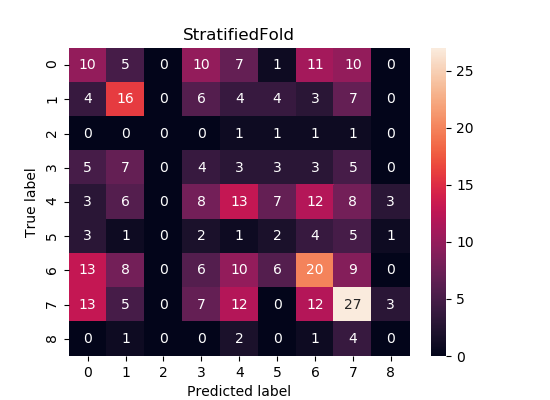

<IPython.core.display.Javascript object>


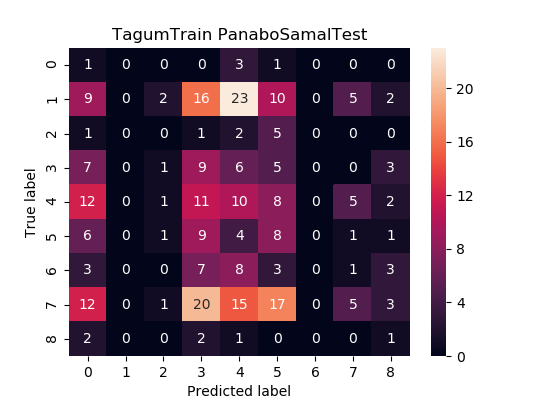

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      24.598930  24.193548  24.864865   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  21.621622  11.764706  19.607843   
Precision_Drug Related Incident (RA 9165)     34.545455  27.906977  32.653061   
Precision_HOMICIDE                             0.000000   0.000000   0.000000   
Precision_MURDER                               9.375000  12.121212   9.302326   
Precision_PHYSICAL INJURIES                   15.789474  25.862069  24.528302   
Precision_RAPE (Art. 266-A RC & R.A.8353)     15.789474  20.000000   8.333333   
Precision_ROBBERY                             32.812500  32.432432  29.850746   
Precision_THEFT                               33.333333  28.235294  35.526316   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     29.629630  11.111111  18.518519   
Recall_Drug Related Incident (RA 9165)        42.222222  27.272727  36.363636   
Recall_HOMICIDE                                0.000000   0.000000   0.000000   
Recall_MURDER                                  9.677419  13.333333  13.333333   
Recall_PHYSICAL INJURIES                      15.000000  25.000000  21.666667   
Recall_RAPE (Art. 266-A RC & R.A.8353)        15.789474  26.315789  10.526316   
Recall_ROBBERY                                28.767123  32.876712  27.777778   
Recall_THEFT                                  26.250000  30.000000  34.177215   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         25.000000  11.428571  19.047619   
F1_Drug Related Incident (RA 9165)            38.000000  27.586207  34.408602   
F1_HOMICIDE                                    0.000000   0.000000   0.000000   
F1_MURDER                                      9.523810  12.698413  10.958904   
F1_PHYSICAL INJURIES                          15.384615  25.423729  23.008850   
F1_RAPE (Art. 266-A RC & R.A.8353)            15.789474  22.727273   9.302326   
F1_ROBBERY                                    30.656934  32.653061  28.776978   
F1_THEFT                                      29.370629  29.090909  34.838710   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      24.552448   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  17.664724   
Precision_Drug Related Incident (RA 9165)     31.701831   
Precision_HOMICIDE                             0.000000   
Precision_MURDER                              10.266179   
Precision_PHYSICAL INJURIES                   22.059948   
Precision_RAPE (Art. 266-A RC & R.A.8353)     14.707602   
Precision_ROBBERY                             31.698560   
Precision_THEFT                               32.364981   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     19.753086   
Recall_Drug Related Incident (RA 9165)        35.286195   
Recall_HOMICIDE                                0.000000   
Recall_MURDER                                 12.114695   
Recall_PHYSICAL INJURIES                      20.555556   
Recall_RAPE (Art. 266-A RC & R.A.8353)        17.543860   
Recall_ROBBERY                                29.807204   
Recall_THEFT                                  30.142405   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         18.492063   
F1_Drug Related Incident (RA 9165)            33.331603   
F1_HOMICIDE                                    0.000000   
F1_MURDER                                     11.060375   
F1_PHYSICAL INJURIES                          21.272398   
F1_RAPE (Art. 266-A RC & R.A.8353)            15.939691   
F1_ROBBERY               

In [25]:
from sklearn.tree import DecisionTreeClassifier

evaluate_model(DecisionTreeClassifier())

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

<IPython.core.display.Javascript object>


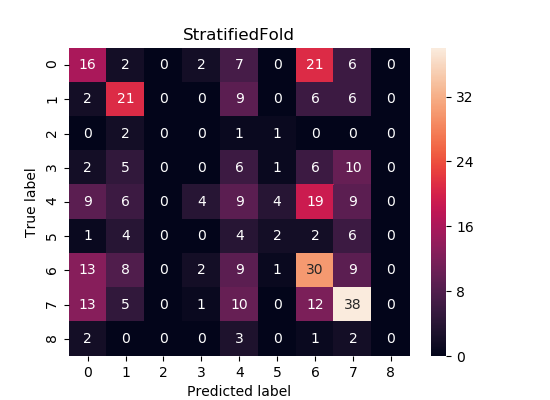

<IPython.core.display.Javascript object>


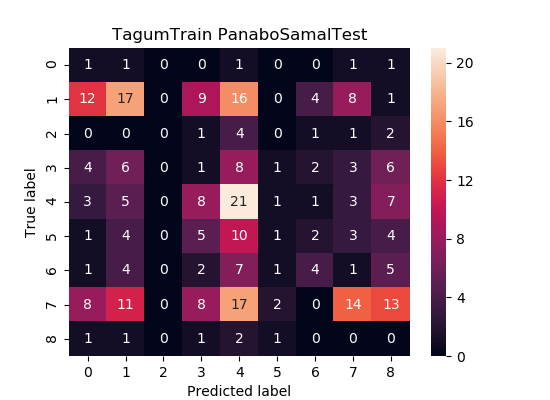

['randomforest_dangerpredict_model.pkl']

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
evaluate_model(rfc)
joblib.dump(rfc, 'randomforest_dangerpredict_model.pkl')

<IPython.core.display.Javascript object>


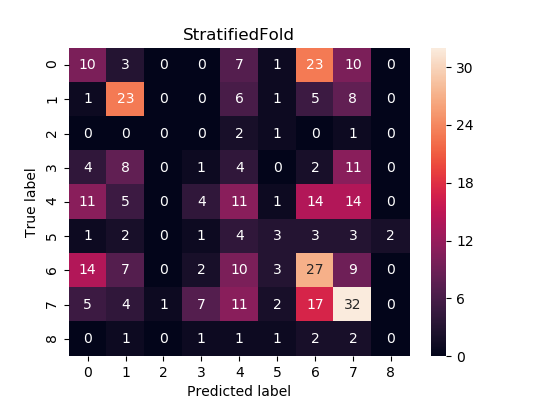

<IPython.core.display.Javascript object>


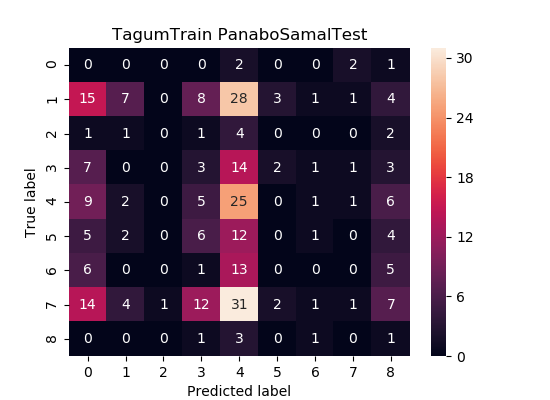

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      34.759358  33.333333  28.918919   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  27.450980  32.758621  21.739130   
Precision_Drug Related Incident (RA 9165)     50.000000  51.063830  43.396226   
Precision_HOMICIDE                            25.000000   0.000000   0.000000   
Precision_MURDER                               4.761905   6.666667   6.250000   
Precision_PHYSICAL INJURIES                   35.185185  27.586207  19.642857   
Precision_RAPE (Art. 266-A RC & R.A.8353)     36.363636  12.500000  23.076923   
Precision_ROBBERY                             37.777778  37.500000  29.032258   
Precision_THEFT                               35.164835  33.673469  35.555556   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     25.925926  35.185185  18.518519   
Recall_Drug Related Incident (RA 9165)        55.555556  54.545455  52.272727   
Recall_HOMICIDE                               25.000000   0.000000   0.000000   
Recall_MURDER                                  3.225806   3.333333   3.333333   
Recall_PHYSICAL INJURIES                      31.666667  26.666667  18.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)        21.052632   5.263158  15.789474   
Recall_ROBBERY                                46.575342  41.095890  37.500000   
Recall_THEFT                                  40.000000  41.250000  40.506329   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         26.666667  33.928571  20.000000   
F1_Drug Related Incident (RA 9165)            52.631579  52.747253  47.422680   
F1_HOMICIDE                                   25.000000   0.000000   0.000000   
F1_MURDER                                      3.846154   4.444444   4.347826   
F1_PHYSICAL INJURIES                          33.333333  27.118644  18.965517   
F1_RAPE (Art. 266-A RC & R.A.8353)            26.666667   7.407407  18.750000   
F1_ROBBERY                                    41.717791  39.215686  32.727273   
F1_THEFT                                      37.426901  37.078652  37.869822   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      32.337204   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  27.316244   
Precision_Drug Related Incident (RA 9165)     48.153352   
Precision_HOMICIDE                             8.333333   
Precision_MURDER                               5.892857   
Precision_PHYSICAL INJURIES                   27.471416   
Precision_RAPE (Art. 266-A RC & R.A.8353)     23.980186   
Precision_ROBBERY                             34.770012   
Precision_THEFT                               34.797953   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     26.543210   
Recall_Drug Related Incident (RA 9165)        54.124579   
Recall_HOMICIDE                                8.333333   
Recall_MURDER                                  3.297491   
Recall_PHYSICAL INJURIES                      25.555556   
Recall_RAPE (Art. 266-A RC & R.A.8353)        14.035088   
Recall_ROBBERY                                41.723744   
Recall_THEFT                                  40.585443   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         26.865079   
F1_Drug Related Incident (RA 9165)            50.933837   
F1_HOMICIDE                                    8.333333   
F1_MURDER                                      4.212808   
F1_PHYSICAL INJURIES                          26.472498   
F1_RAPE (Art. 266-A RC & R.A.8353)            17.608025   
F1_ROBBERY               

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
evaluate_model(GradientBoostingClassifier())

### Naive Bayes 

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

<IPython.core.display.Javascript object>


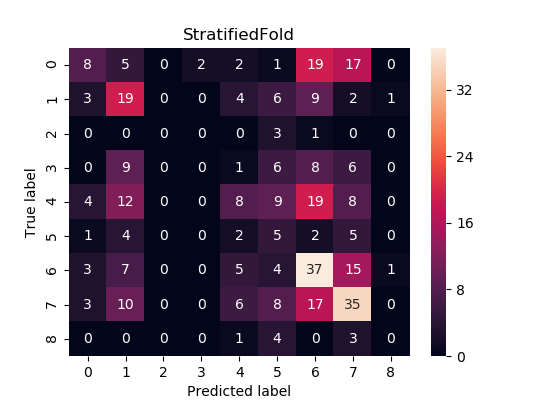

<IPython.core.display.Javascript object>


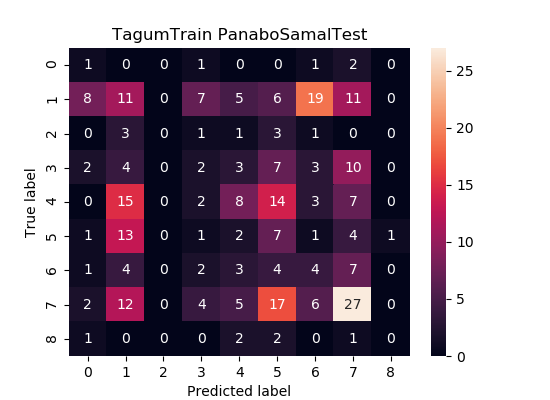

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      32.887701  25.537634  30.270270   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  40.740741  20.689655  36.363636   
Precision_Drug Related Incident (RA 9165)     30.263158  22.222222  28.787879   
Precision_HOMICIDE                             0.000000   0.000000   0.000000   
Precision_MURDER                               0.000000   0.000000   0.000000   
Precision_PHYSICAL INJURIES                   13.793103  12.500000  27.586207   
Precision_RAPE (Art. 266-A RC & R.A.8353)     21.875000  13.793103  10.869565   
Precision_ROBBERY                             30.927835  29.729730  33.035714   
Precision_THEFT                               42.857143  37.647059  38.461538   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     20.370370  11.111111  14.814815   
Recall_Drug Related Incident (RA 9165)        51.111111  27.272727  43.181818   
Recall_HOMICIDE                                0.000000   0.000000   0.000000   
Recall_MURDER                                  0.000000   0.000000   0.000000   
Recall_PHYSICAL INJURIES                       6.666667  13.333333  13.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)        36.842105  21.052632  26.315789   
Recall_ROBBERY                                41.095890  45.205479  51.388889   
Recall_THEFT                                  60.000000  40.000000  44.303797   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         27.160494  14.457831  21.052632   
F1_Drug Related Incident (RA 9165)            38.016529  24.489796  34.545455   
F1_HOMICIDE                                    0.000000   0.000000   0.000000   
F1_MURDER                                      0.000000   0.000000   0.000000   
F1_PHYSICAL INJURIES                           8.988764  12.903226  17.977528   
F1_RAPE (Art. 266-A RC & R.A.8353)            27.450980  16.666667  15.384615   
F1_ROBBERY                                    35.294118  35.869565  40.217391   
F1_THEFT                                      50.000000  38.787879  41.176471   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      29.565202   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  32.598011   
Precision_Drug Related Incident (RA 9165)     27.091086   
Precision_HOMICIDE                             0.000000   
Precision_MURDER                               0.000000   
Precision_PHYSICAL INJURIES                   17.959770   
Precision_RAPE (Art. 266-A RC & R.A.8353)     15.512556   
Precision_ROBBERY                             31.231093   
Precision_THEFT                               39.655247   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     15.432099   
Recall_Drug Related Incident (RA 9165)        40.521886   
Recall_HOMICIDE                                0.000000   
Recall_MURDER                                  0.000000   
Recall_PHYSICAL INJURIES                      11.111111   
Recall_RAPE (Art. 266-A RC & R.A.8353)        28.070175   
Recall_ROBBERY                                45.896753   
Recall_THEFT                                  48.101266   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         20.890319   
F1_Drug Related Incident (RA 9165)            32.350593   
F1_HOMICIDE                                    0.000000   
F1_MURDER                                      0.000000   
F1_PHYSICAL INJURIES                          13.289839   
F1_RAPE (Art. 266-A RC & R.A.8353)            19.834087   
F1_ROBBERY               

In [28]:
from sklearn.naive_bayes import BernoulliNB
evaluate_model(BernoulliNB())

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<IPython.core.display.Javascript object>


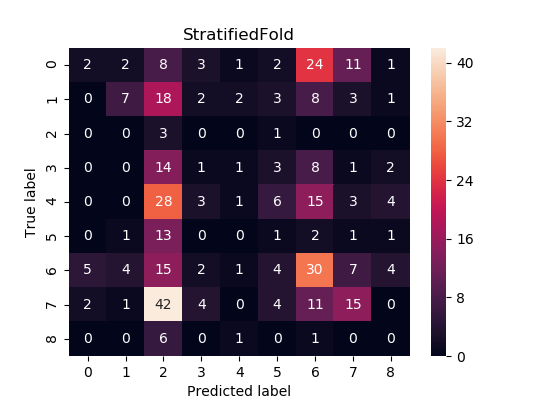

<IPython.core.display.Javascript object>


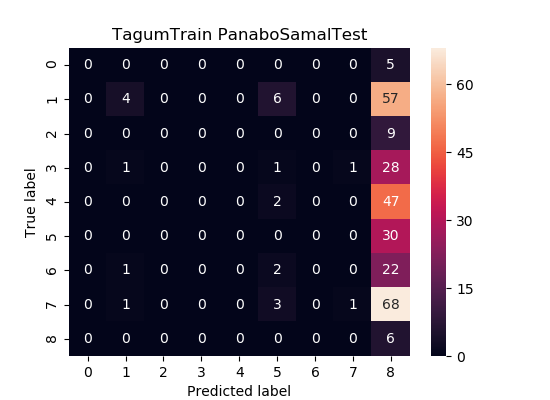

fold_1     fold_2  \
index                                                                 
Accuracy                                       17.914439  12.903226   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC    0.000000  16.666667   
Precision_Drug Related Incident (RA 9165)      40.000000  20.000000   
Precision_HOMICIDE                              2.941176   1.869159   
Precision_MURDER                               12.500000   5.000000   
Precision_PHYSICAL INJURIES                    21.052632  15.625000   
Precision_RAPE (Art. 266-A RC & R.A.8353)       9.523810   8.000000   
Precision_ROBBERY                              38.709677  26.363636   
Precision_THEFT                                26.666667  17.241379   
Precision_Vehicular Traffic Accident            0.000000   3.030303   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC       0.000000   1.851852   
Recall_Drug Related Incident (RA 9165)         13.333333   4.545455   
Recall_HOMICIDE                               100.000000  50.000000   
Recall_MURDER                                   9.677419   3.333333   
Recall_PHYSICAL INJURIES                        6.666667   8.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)         10.526316  10.526316   
Recall_ROBBERY                                 49.315068  39.726027   
Recall_THEFT                                   15.000000   6.250000   
Recall_Vehicular Traffic Accident               0.000000  12.500000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC           0.000000   3.333333   
F1_Drug Related Incident (RA 9165)             20.000000   7.407407   
F1_HOMICIDE                                     5.714286   3.603604   
F1_MURDER                                      10.909091   4.000000   
F1_PHYSICAL INJURIES                           10.126582  10.869565   
F1_RAPE (Art. 266-A RC & R.A.8353)             10.000000   9.090909   
F1_ROBBERY                                     43.373494  31.693989   
F1_THEFT                                       19.200000   9.174312   
F1_Vehicular Traffic Accident                   0.000000   4.878049   

                                                 fold_3       mean  \
index                                                                
Accuracy                                      16.216216  15.677960   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  22.222222  12.962963   
Precision_Drug Related Incident (RA 9165)     46.666667  35.555556   
Precision_HOMICIDE                             2.040816   2.283717   
Precision_MURDER                               6.666667   8.055556   
Precision_PHYSICAL INJURIES                   14.285714  16.987782   
Precision_RAPE (Art. 266-A RC & R.A.8353)      4.166667   7.230159   
Precision_ROBBERY                             30.303030  31.792115   
Precision_THEFT                               36.585366  26.831137   
Precision_Vehicular Traffic Accident           0.000000   1.010101   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      3.703704   1.851852   
Recall_Drug Related Incident (RA 9165)        15.909091  11.262626   
Recall_HOMICIDE                               75.000000  75.000000   
Recall_MURDER                                  3.333333   5.448029   
Recall_PHYSICAL INJURIES                       1.666667   5.555556   
Recall_RAPE (Art. 266-A RC & R.A.8353)         5.263158   8.771930   
Recall_ROBBERY                                41.666667  43.569254   
Recall_THEFT                                  18.987342  13.412447   
Recall_Vehicular Traffic Accident              0.000000   4.166667   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          6.349206   3.227513   
F1_Drug Related Incident (RA 9165)            23.728814  17.045407   
F1_HOMICIDE                                    3.973510   4.430466   
F1_MURDER                                      4.444444   6.451178   
F1_PHYSICAL INJURIES                           2.985075   7.993741   
F1_RAPE (Art. 266-A RC & R.A.8353)             4.651163   7.914024   
F1_ROBBERY                   

In [29]:
from sklearn.naive_bayes import MultinomialNB
evaluate_model(MultinomialNB())